<p style="font-family: Arial Black; font-size:1.3em;color:red;"> Section-I Inferential Statistics </p>   

*  <span style='font-family: Arial Black;font-size:0.9em'> Load the libraries </span>    

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()


## Load the dataset

What we have here is a data set for the IQ levels of students at Starbucks University which is assumed to follow a Normal distribution $IQ$ ~ $N(\mu, \sigma^{2})$ where $\mu=110$ (mean IQ) and $\sigma=5$ (standard deviation). The output is stored in file `IQSU.txt`. Use this data file to read the data into a Pandas dataframe for subsequent operations for data analysis.

In [3]:
# read from the data file
df = pd.read_csv('data/IQSU.txt', header=None)
df.head()

,0
0,112.206137
1,108.345649
2,122.153856
3,108.739539
4,110.548049


In [3]:
print('Shape of df:',df.shape)
print('Type of df :',type(df))

Shape of df: (1000, 1)
Type of df : <class 'pandas.core.frame.DataFrame'>


In [5]:
IQ = df.iloc[:, 0] # All rows from the first (0) column of dataframe
print('Type of IQ:', type(IQ))

Type of IQ: <class 'pandas.core.series.Series'>


In [6]:
IQ.describe()

count    1000.000000
mean      110.166385
std         4.951921
min        93.580423
25%       106.881725
50%       110.118628
75%       113.507488
max       128.061593
Name: 0, dtype: float64

We shall create a histogram with bins containing the number of data points within the interval defined by that specific bin.
For example, the count below gives the number of measurements within the range of $100 < IQ \leq 120$ 

In [6]:
# How many data points do we have between 100 and 120 (including 120)
print(sum(1 for i in IQ if ((i > 100) & (i <= 120))), 'out of', len(IQ))

949 out of 1000


## Histogram (frequency distribution)

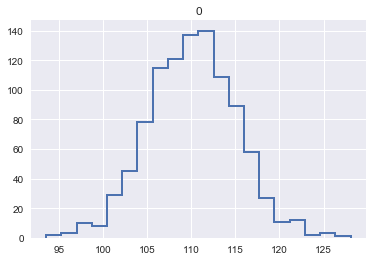

In [7]:
# plotting a histogram directly from pandas
df.hist(bins=20, histtype='step', lw=2); 

#### How deos bin size affect the histogram?
The `bins` parameter tells you the number of bins that your data will be divided into. You can specify it as an integer or as a list of bin edges.

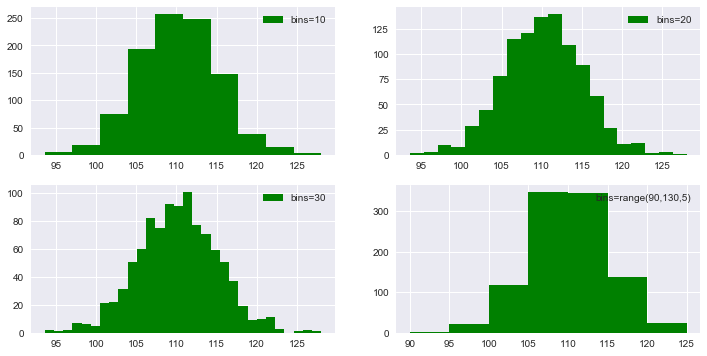

In [19]:
plt.figure(figsize=(12,6))
# subplot(number_of_rows, number_of_columns, active_subplot)
plt.subplot(2,2,1) 
plt.hist(IQ, bins=10, color='g', label='bins=10')
plt.legend(loc='upper right')

plt.subplot(2,2,2)
plt.hist(IQ, bins=20, color='g', label='bins=20')
plt.legend(loc='upper right')

plt.subplot(2,2,3)
plt.hist(IQ, bins=30, color='g', label='bins=30')
plt.legend(loc='upper right')

plt.subplot(2,2,4)
plt.hist(IQ, bins=range(90,130,5), color='g', label='bins=range(90,130,5)')
plt.legend(loc='upper right')

#plt.tight_layout()
plt.show()

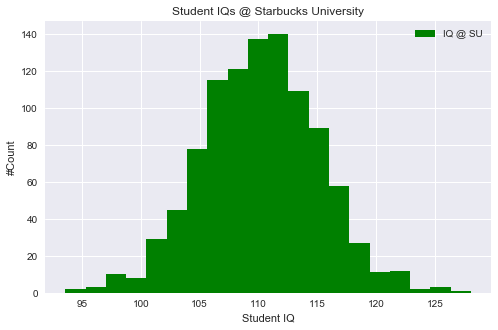

In [13]:
plt.figure(figsize=(8,5))
plt.hist(IQ, bins=20, color='g', label='IQ @ SU')
plt.title('Student IQs @ Starbucks University')
plt.xlabel('Student IQ') ; plt.ylabel('#Count') ; plt.legend(loc='upper right')
plt.show()

## Histogram (relative frequency)

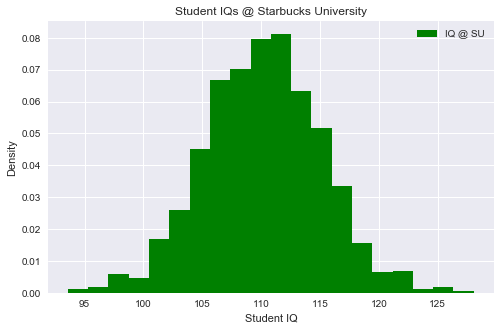

In [14]:
plt.figure(figsize=(8,5))
plt.hist(IQ, bins=20, density=True, color='g', label='IQ @ SU') # remove density=True, it becomes freq dist
plt.title('Student IQs @ Starbucks University')
plt.xlabel('Student IQ') ; plt.ylabel('Density') ; plt.legend(loc='upper right')
plt.show()

## Cumulative relative frequency

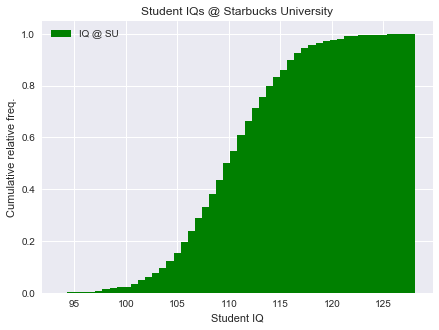

In [18]:
plt.figure(figsize=(7,5))
plt.hist(IQ, bins=50, density=True, cumulative=1, color='g', label='IQ @ SU')
plt.title('Student IQs @ Starbucks University')
plt.xlabel('Student IQ') ; plt.ylabel('Cumulative relative freq.')
plt.legend(loc='upper left')
plt.show()

## Skewness

In [16]:
print('Skewness:', IQ.skew())

Skewness: 0.0029397970778169413


In [17]:
# Using SciPy
import scipy.stats
print('Skewness:', scipy.stats.skew(IQ))

Skewness: 0.0029353855435398464


<b>Result:</b> -0.5 < skewness < 0.5 => Based on these results, we can say that our data has a symmetric distribution

## Measure of central tendency and spread (dispersion)

`Mean`: The average of the data set<br>
$$\bar{x} = \frac{1}{n}$$
`Median`: Measure of the center of the data set (50th percentile)<br>
`Mode`: Point with the highest frequency

`Variance`: Measure of how far a set of numbers are spread out from their average  
$$s^2 = \frac{\sum_{i=1}^n (x_i - \overline{x}_n)^2}{n-1}  $$
`Standard deviation`: Square root of variance (takes the units of measure of the data that it represents) 

In [22]:
import random
# create a random list of 10 numbers in range(0,100)
x = random.sample(range(0, 100), 10) 
print('Mean    :', sum(x)/len(x), '(using formula)')
print('Mean    :', np.mean(x), '(using numpy)')
print('Median  :', np.median(x), '(using numpy)')
print('Std dev :', np.sqrt(sum((x-np.mean(x))**2)/(len(x)-1)), '(using formula)')
print('Std dev :', np.std(x, ddof=1), '(using numpy)')

Mean    : 58.7 (using formula)
Mean    : 58.7 (using numpy)
Median  : 71.5 (using numpy)
Std dev : 28.913856731870123 (using formula)
Std dev : 28.913856731870123 (using numpy)


## Boxplots

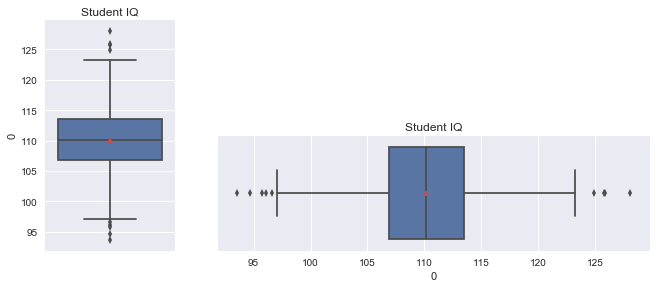

In [7]:
plt.axes([0.1,0.01,0.3,0.8]) 
ax = sns.boxplot(IQ, showmeans=True, orient='v')
ax.set_title('Student IQ')

plt.axes([0.5,0.01,1.0,0.4])
ax = sns.boxplot(IQ, showmeans=True, orient='h')
ax.set_title('Student IQ')
plt.show()

#### How does a boxplot look like for a skewed distribution?

In [29]:
yy = np.random.randn(10,1)
yy.shape

(10, 1)

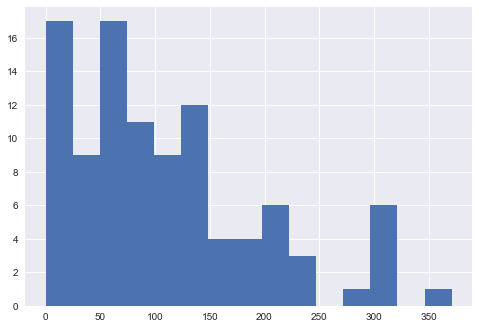

In [30]:
np.random.seed(42)  # To ensure we get the same data every time.
# random.rnadn(100,1) - An array with 100 points shape:(100,1)
X = (np.random.randn(100,1) * 5 + 10)**2
plt.hist(X, bins=15);

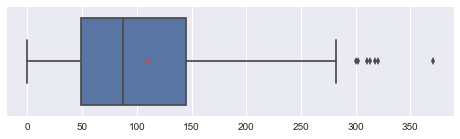

In [21]:
# change the fig size and make it horizontal
plt.figure(figsize=(8, 2))
sns.boxplot(X, showmeans=True, orient='h');

The mean and median are clearly separated for a highly skewed data

### Multiple boxplots

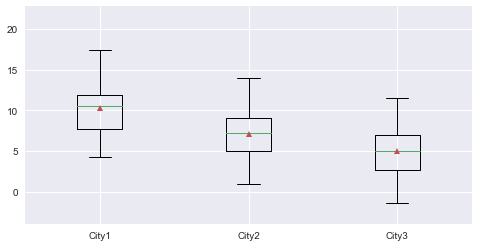

In [22]:
City1 = np.random.normal(10,3,120)
City2 = np.random.normal(7,3,120)
City3 = np.random.normal(5,3,120)
location = [City1, City2, City3]
plt.figure(figsize=(8, 4))
plt.boxplot(location, showmeans=True)
plt.xticks([1, 2, 3], ['City1', 'City2', 'City3'])
plt.show()

We'll now draw a random sample from a **GAMMA** distribution (highly skewed) and examine the QQ plot:

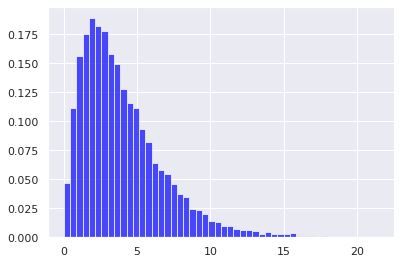

In [6]:
plt.axes([0.1,0.01,0.8,0.8])
rate = 0.5
y2 = np.random.gamma(shape=2, scale=1/rate, size=10000)
plt.hist(y2, bins=50, density=True, facecolor="blue", alpha=0.7)
plt.show()


# Example

## Effect of bin size
In a restaurant, one waiter recorded information about each tip he received over a period of a few months working in one restaurant. He collected the following variables and created a small and simple dataset:

|Variable|Explanation|
|---|---|
|obs|Observation number|
|totbill|The cost of the bill in US dollars|
|tip|Tip in US dollars|
|sex|Gender of the bill payer|
|smoker|Whether the party included smokers|
|day|Day of the week|
|time|Time of day|
|size|Size of the party|

There are 244 records in the dataset. The data was reported in a collection of case studies for business statistics (Bryant & Smith 1995). The primary goal is: What are the factors that affect tipping behavior?

Out of 7 variables (obs not included), 3 variables are numerical and 4 variables are categorical.

The most important variable here is: **tip**<br>
So let's take a look at the histogram for the tip and see what it can tell us:

Ref: http://ggobi.org

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./data/tips.csv', sep=",")
df.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obs,244.0,122.500000,70.580923,1.00,61.7500,122.500,183.2500,244.00
totbill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


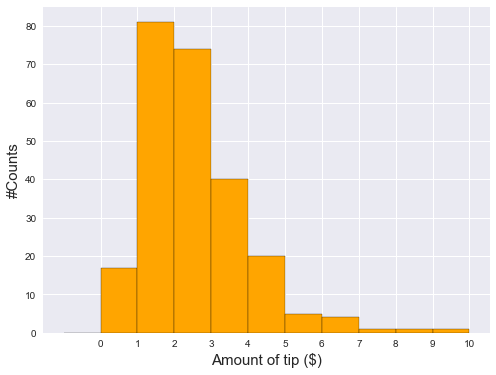

In [29]:
#Let's create a histogram for the "tip"
tip = df.tip
plt.figure(figsize=(8,6))
plt.hist(tip, bins=np.arange(0,12,1)-0.5, align='left', facecolor="orange", edgecolor='k')
plt.xticks(range(11))
plt.ylabel('#Counts',fontsize=15)
plt.xlabel('Amount of tip ($)',fontsize=15)
plt.show()

We choose an initial bin width of 1 (dollar) and produce the above histogram. The **distribution appears to be unimodal and skewed**; that is, it has one peak, the bar representing the tips greater than \$1.00 and less than or equal  \$2.00. There are
very few tips of \$1.00 or less. The number of larger tips trails off rapidly, which suggests that this is not a very expensive restaurant. 

What if change the bin size (say \$ 0.1 = 10 cents) and plot the histogram again?

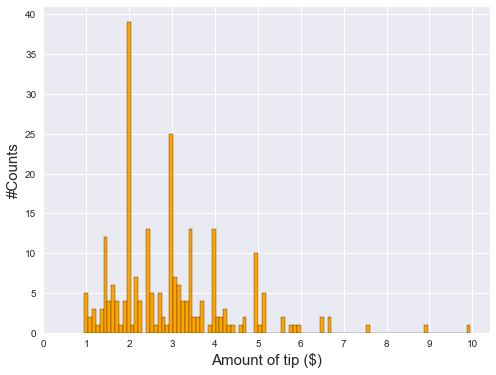

In [30]:
plt.figure(figsize=(8,6))
plt.hist(tip, bins=100, align='left', facecolor="orange", edgecolor='k')
plt.xticks(range(11))
plt.ylabel('#Counts',fontsize=15)
plt.xlabel('Amount of tip ($)',fontsize=15)
plt.show()

At the smaller bin width (10 cents), the **shape is multimodal**, and it is clear that there are **large peaks at the full
dollars** and **smaller peaks at the half dollar**. This shows that the **customers tended to round the tip to the nearest fifty cents or dollar**. So a smaller bin width can bring out some of the more local features which may not be apparent in the wider bins which are more suitable for global trends.